In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
import scipy.sparse
import scipy.sparse.linalg as sla

## Task 2

In [2]:
n = 10
ex = np.ones(n)
A = sp.sparse.spdiags(np.vstack((-ex, 2 * ex, -ex)), [-1, 0, 1], n, n, 'csr')
rhs = np.random.normal(size=n)

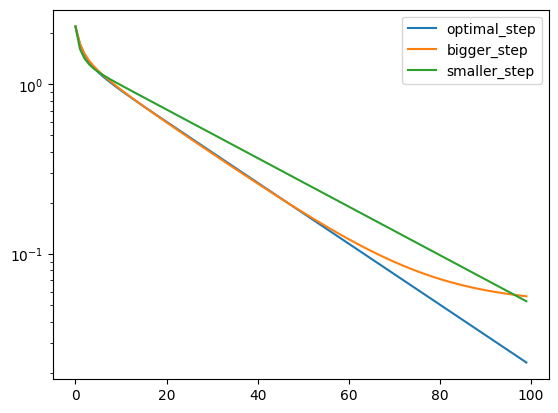

In [3]:
# richardson iteration
lam_max = sla.eigsh(A, k=1, which='LA', return_eigenvectors=False)
lam_min = sla.eigsh(A, k=1, which='SA', return_eigenvectors=False)
tau = 2.0 / (lam_max + lam_min)

def richardson(steps, tau):
    x = np.zeros(n)
    res = []
    for i in range(steps):
        r = A.dot(x) - rhs
        x = x - tau * r
        res.append(np.linalg.norm(r))
    return res

plt.plot(richardson(100, tau), label = 'optimal_step')
plt.plot(richardson(100, tau * 1.02), label = 'bigger_step')
plt.plot(richardson(100, tau * 0.8), label = 'smaller_step')
plt.yscale('log')
plt.legend()

## Task 3

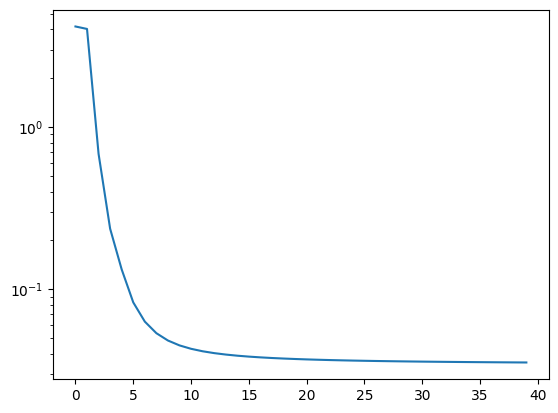

In [4]:
def CG(A, rhs, x, steps):
    res = []
    r = A.dot(x) - rhs
    d = r.copy()
    d_array = [d]
    for i in range(steps):
        alpha = r.dot(r) / d.dot(A @ d)
        x = x - alpha * r
        r_next = A.dot(x) - rhs
        beta = r_next.dot(r_next) / r.dot(r)
        d = r_next + beta * d
        d_array.append(d)
        res = np.append(res, np.linalg.norm(r_next))
        r = r_next
    return res, d_array


A = np.array([[3, 2], [2, 6]])
rhs = np.array([2, -8])
x0 = np.array([0, 0])
res, d_array = CG(A, rhs, x0, 40)

plt.plot(res)
plt.yscale('log')

In [5]:
N = 10
D = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        D[i,j] = d_array[i].T @ A.dot(d_array[j])
D

array([[ 3.32000000e+02, -7.10542736e-15,  1.81811481e+02,
         9.79923489e+00,  7.26092144e+00,  1.69879167e+00,
         1.91145087e+00,  1.84698353e+00,  1.93299796e+00,
         2.10608222e+00],
       [-7.10542736e-15,  4.99286902e+01,  2.47865002e+01,
         7.37689810e+00,  2.21451689e+00,  2.17073586e+00,
         1.53661570e+00,  1.45126386e+00,  1.52495341e+00,
         1.67240724e+00],
       [ 1.81811481e+02,  2.47865002e+01,  1.11869463e+02,
         9.02847815e+00,  5.07563208e+00,  2.00793651e+00,
         1.80959264e+00,  1.73191681e+00,  1.81560275e+00,
         1.98358970e+00],
       [ 9.79923489e+00,  7.37689810e+00,  9.02847815e+00,
         1.37915890e+00,  5.41503620e-01,  3.70864499e-01,
         2.83450883e-01,  2.68937457e-01,  2.82363773e-01,
         3.09258597e-01],
       [ 7.26092144e+00,  2.21451689e+00,  5.07563208e+00,
         5.41503620e-01,  2.57019918e-01,  1.33432929e-01,
         1.09958330e-01,  1.04762752e-01,  1.09912305e-01,
         1.

## Task 4

In [22]:
import pickle
from scipy.sparse.linalg import LinearOperator, cg
from scipy.linalg import norm
with open(r"../data/data.pkl", "rb") as input_file:
    data = pickle.load(input_file)

No, I'm not abe to allocatte this matrix and work with it as usual.

In [16]:
d, v, s, b = data['d'], data['v'], data['s'], data['b']
v1 = np.array(v[:, 0])
v2 = np.array(v[:,1])
d = np.array(d)

np.diag(d) + s[0]*v1.multiply(v1.T) + s[1]*v2.multiply(v2.T)

MemoryError: Unable to allocate 18.6 GiB for an array with shape (50000, 50000) and data type float64

In [23]:
# making Liner Operator
def matvec_prod(x):
    v1x = v1 @ x
    v2x = v2 @ x
    return np.multiply(x, d) + s[0]*v1x*v1 + s[1]*v2x*v2

A = LinearOperator(shape=(50000,50000), matvec=matvec_prod)

res = cg(A,b, maxiter=1000) # Solving with Conjugate Gradient Method
x = res[0]
print(f' ||Ax - b|| / ||x|| = {norm(A.matvec(x)) / norm(x)}')

array([ -168.33264385,   252.46993888,   124.99482811, ...,
       28212.14818699,  5234.42179509,  2641.34256871])

## Task 6

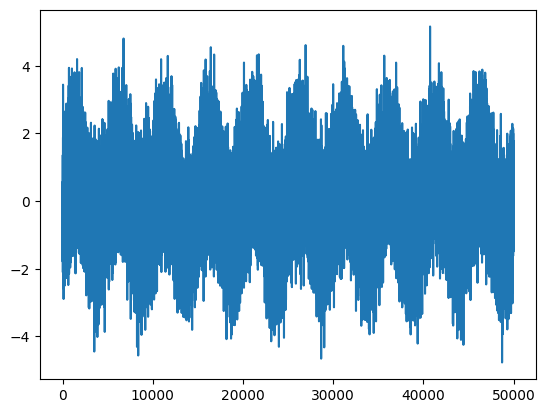

In [40]:
from matplotlib import pyplot as plt
y = np.load('../data/y.npy')
plt.plot(y)

In [ ]:
y = np.